# Credible intervals

The numbers presented in the previous chapter are not "certain" numbers. We have to associate some sort of "error bar", or "credible intervals" with each value. So, if we say Messi's estimated conversion rate is 15%, we need to associate that number with a credible interval - the uncertainty range of a player's conversion rate. 

In [1]:
%load_ext autoreload
%autoreload 2
from scipy.stats import beta
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd 
import numpy as np
import matplotlib.cm as cm

First, we recreate the beta prior model from last chapter, and plot the prior distribution of the population, and the posterior distribution for several notable players.

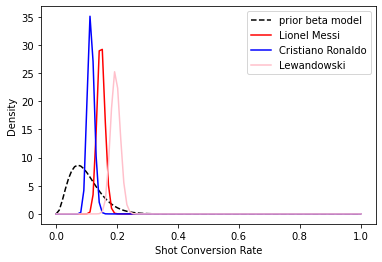

In [2]:
df = pd.read_csv('fbrefshootingdata.csv', encoding='utf-8-sig')
df = df[(df.npG >= 1) & (df.Shots >= 10)].reset_index(drop=True)
df['Conv'] = df['npG']/df['Shots']
bf = beta.fit(df['Conv'], floc=0, fscale=1)
df['Eb_Conv'] = (df['npG']+bf[0])/(df['Shots']+bf[0]+bf[1])

fig,ax = plt.subplots()

def distribution_plotter(a, b, ax, label, color, ls):
    x = np.linspace(0,1,100)
    y = beta.pdf(x, a, b)
    ax.plot(x,y,label=label,ls=ls,color=color)

distribution_plotter(bf[0], bf[1], ax, 'prior beta model', 'k', '--') 
for player,color in zip(['Lionel Messi','Cristiano Ronaldo','Lewandowski'],['r','b','pink']):
    dfp = df[df.Player.str.contains(player)]
    a = dfp['npG'] + bf[0]
    b = dfp['Shots'] + bf[1] - dfp['npG']
    distribution_plotter(a, b, ax, player, color, '-')

ax.set_xlabel('Shot Conversion Rate');
ax.set_ylabel('Density');
ax.legend();

Next, we plot the 95% credible intervals for the posterior distributions of each player.Shown is the example of Lionel Messi

In [3]:
def player_cred_intv(ranges, player, ax, ls, color):
    dfp = df[df.Player.str.contains(player)]
    a = dfp['npG'] + bf[0]
    b = dfp['Shots'] + bf[1] - dfp['npG']
    lower, upper = beta.ppf(ranges, a, b)
    x = np.linspace(0,1,1000)
    y = beta.pdf(x, a, b)
    ax.plot(x,beta.pdf(x,bf[0],bf[1]),label='prior',ls='--',color='k')
    ax.plot(x,y,label=player+' '+str(100 - int(2*ranges[0]*100))+'% credible intervals',ls=ls,color=color)
    ax.plot([lower, upper], [0,0], 'k')
    xcv = np.linspace(lower,upper,1000)
    ycv = beta.pdf(xcv,a,b)
    ax.fill_between(xcv,ycv,0,color=color,alpha=0.2)

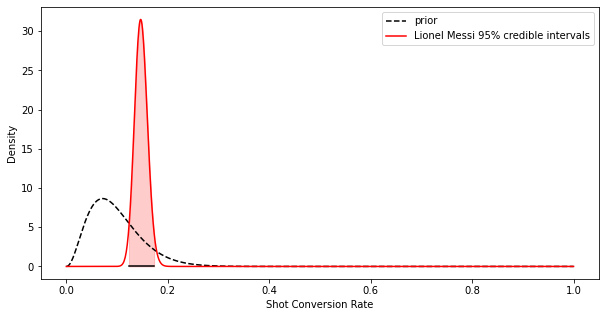

In [4]:
fig, ax = plt.subplots(figsize=(10,5),)
player_cred_intv([0.025,0.975],'Lionel Messi',ax,ls='-',color='r')
ax.set_xlabel('Shot Conversion Rate');
ax.set_ylabel('Density');
ax.legend();

Finally we show the 95% credible intervals for several notable players who are generally regarded as great finishers by the football fans.

In [5]:
def plot_multiple_cred_intervals(ranges, players, ax):
    interval = str(100 - int(2*ranges[0]*100))+'% credible intervals'
    for i, player in enumerate(players):
        dfp = df[df.Player.str.contains(player)]
        a = dfp['npG'] + bf[0]
        b = dfp['Shots'] + bf[1] - dfp['npG']
        ax.scatter(dfp.Eb_Conv.values,i,color='k',zorder=3)
        lower, upper = beta.ppf(ranges, a, b)
        print(player,dfp.Eb_Conv.values - lower,upper-dfp.Eb_Conv.values)
        ax.errorbar(dfp.Eb_Conv.values,i,xerr=[dfp.Eb_Conv.values - lower,upper - dfp.Eb_Conv.values],
                    color='r',zorder=2,capsize=6)
    ax.axvline(bf[0]/(bf[0]+bf[1]),ls='--',color='r')
    ax.set_yticks([i for i in range(len(players))])
    ax.set_yticklabels(players)
    ax.set_title('Empirical Bayes Estimates of Conversion Rates',fontsize=20,color='k')

Lionel Messi [0.02396865] [0.02567684]
Lewandowski [0.02979379] [0.03160631]
Ronaldo [0.02113241] [0.02297541]
Griezmann [0.03464872] [0.03820561]
Kylian Mbappé [0.03366679] [0.03604528]
Erling [0.05657536] [0.06119304]


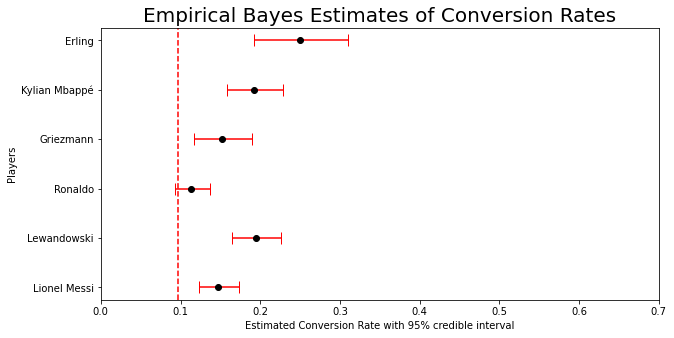

In [6]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_xlim(0,0.7)
players = ['Lionel Messi','Lewandowski','Ronaldo','Griezmann','Kylian Mbappé','Erling']
plot_multiple_cred_intervals([0.025,0.975],players,ax)
ax.set_xlabel('Estimated Conversion Rate with 95% credible interval');
ax.set_ylabel('Players');